# Stochastic processes

In the final part of the course, we'll discuss stochastic processes that capture the inherent random nature of biological phenomena.  In these models, the quantity of interest will often be the probability that our system is of a certain size.  For example, a question that one might ask of such a model is: what is the probability that the human population in 2138 will be 332342356 given its current size?  Based on this, it is interesting to consider how these models are related to the deterministic ODE models that we discussed earlier, and whether similar predictions emerge.  For example, again regarding population dynamics, we might ask does: the ODE model describe the dynamics of the mean population size of the related stochastic process?  

## Continuous-Time Markov Chains (CTMC)

The models that we will discuss fall under the category of \textit{continuous-time Markov chains}, which we will introduce here.  Suppose the quantity $X(t)$ is a random variable that depends on time, $t$, and takes values in the natural numbers, $0, 1, 2, \dots$.  For example, $X(t)$ could represent the size of a population at time $t$, or perhaps the number of molecules involved in a chemical reaction.  We'll be interested in answering the question: what is $p_{i}(t) = \text{Prob}\left\{X(t) = i\right\}$, the probability that $X = i$ at time $t$?  Once we know $p_i(t)$ for each $i$, we can compute the mean of the process through

\begin{align*}
m(t) = \sum_{i=0}^\infty ip_i(t), \\
\end{align*}

as well as the variance, 

\begin{align*}
\sigma^2(t) = \sum_{i=0}^\infty i^2 p_i(t) - m^2(t). \\
\end{align*}


### Transition probabilities

The answer to the question posed above will often depend on the state of the system at previous times.  Thinking again about a growing population -- the population size at time $t$ is more likely to be larger if it had a greater value at time $s$ for some $s < t$.  Thus, what we would like to do is relate $X(t)$ to $X(s)$.  This is done via the *transition probability*

\begin{align*}
p_{ji}(t - s) = \text{Prob}\left\{X(t) = j | X(s) = i \right\}
\end{align*}

for $s < t$.  Here, we have assumed that the process is stationary, i.e. $p_{ji}(t,s) = p_{ji}(t - s)$.  The transition probabilities can be viewed as the entries of a matrix, $P(t) = [p_{ji}(t)]$.  The transition probabilities also satisfy what is known as the Chapman-Kolmogorov equations 

\begin{align*}
p_{ji}(t + s) = \sum_{k = 0}^{\infty} p_{jk}(t)p_{ki}(s),
\end{align*}

which, in matrix form is, $P(t + s) = P(t)P(s)$.  And, in most cases, (in fact, for all the cases that we will consider) we will also have,

\begin{align*}
\sum_{j = 0}^{\infty} p_{ji}(t) = 1, t\geq 0
\end{align*}

#### Infinitesimal transition probabilities for the Poisson process

One of the most fundamental stochastic processes is the Poisson process.  One way to define the Poisson process is by specifying the infinitesimal transition probabilities, $p_{ji}(\Delta t)$ for $\Delta t \ll 1$.  A Poisson process is defined as 

\begin{enumerate}
\item At $t = 0$, $X(0) = 0$.
\item For sufficiently small $\Delta t$, the transition probabilities are given by

\begin{align*}
p_{i+1,i}(\Delta t) &= \text{Prob}\left\{X(t + \Delta t) = i+1 | X(t) = i \right\} = \lambda \Delta t + o(\Delta t)\\
p_{ii}(\Delta t) &= \text{Prob}\left\{X(t + \Delta t) = i | X(t) = i \right\} = 1 - \lambda \Delta t + o(\Delta t)\\
p_{ji}(\Delta t) &= \text{Prob}\left\{X(t + \Delta t) = j | X(t) = i \right\} = o(\Delta t), j\geq i + 2 \\
p_{ji}(\Delta t) &= 0, j < i \\
\end{align*}

\end{enumerate}

where $o(\Delta t)$ (''little oh $\Delta t$'') indicates quantites that are smaller than $\Delta t$ in the limit $\Delta t \rightarrow 0$, i.e. $f(\Delta t) = o(\Delta t)$ if 

\begin{align*}
\lim_{\Delta t \rightarrow 0}\frac{f(\Delta t)}{\Delta t} = 0
\end{align*}

### Generator matrix

Let's assume that the entries $p_{ji}(t)$ are continuously differentiable for $t \geq 0$ and that for $t=0$, they satisfy $p_{ji}(0) = 0$ for $j\neq i$, and $p_{ii}(0) = 1$.  The entries of the generator matrix, $q_{ji}$, are defined as

\begin{align*}
q_{ji} = \lim_{\Delta t \rightarrow 0^+}\frac{p_{ji}(\Delta t) - p_{ji}(0)}{\Delta t} = \lim_{\Delta t \rightarrow 0^+}\frac{p_{ji}(\Delta t)}{\Delta t}
\end{align*}

for $i \neq j$, and 

\begin{align*}
q_{ii} = \lim_{\Delta t \rightarrow 0^+}\frac{p_{ji}(\Delta t) - p_{ji}(0)}{\Delta t} = \lim_{\Delta t \rightarrow 0^+}\frac{p_{ji}(\Delta t) - 1}{\Delta t}.
\end{align*}

Since $\sum_{j=0}^{\infty} p_{ji}(\Delta t) = 1$, we have $1 - p_{ii}(\Delta t) = \sum_{j \neq i} p_{ji}(\Delta t)$ and, therefore,

\begin{align*}
q_{ii} = - \sum_{j\neq i} q_{ji}.
\end{align*}

Accordingly, for sufficiently small we can express the transition probabilities as

\begin{align}
p_{ji}(\Delta t) = \delta_{ji} + q_{ji}\Delta t + o(\Delta t),
\label{eq:pinq}
\end{align}

and in matrix form as $P(\Delta t) = I + Q \Delta t + o(\Delta t)$, where $Q = [q_{ji}]$.

### Generator matrix for the Poisson process

Based on the transition probabilities for the Poisson process, we see that the non-zero entries of the generator matrix are

\begin{align*}
q_{ii} &= -\lambda \\
q_{i+1, i} &= \lambda
\end{align*}

## Kolmogorov differential equations 

We can put together what we have done so far to derive a differential equation for $p_i(t)$.  Let's first consider the Chapman-Kolmogorov equation, 

\begin{align*}
p_{ji}(t + \Delta t) = \sum_{k = 0}^{\infty} p_{jk}(\Delta t)p_{ki}(t)
\end{align*}

and, using \eqref{eq:pinq} from above write,

\begin{align*}
p_{ji}(t + \Delta t) = \sum_{k = 0}^{\infty} \left[\delta_{jk} + q_{jk}\Delta t + o(\Delta t)\right]p_{ki}(t)
\end{align*}

Since $\sum_{k = 0}^{\infty} \delta_{jk}p_{ki}(t) = p_{ji}(t)$, and $\sum_{k = 0}^{\infty}p_{ki}(t) = 1$, we have 

\begin{align*}
p_{ji}(t + \Delta t) = p_{ji}(t) + \Delta t \sum_{k = 0}^{\infty}  q_{jk}p_{ki}(t) + o(\Delta t).
\end{align*}

Substracting $p_{ji}(t)$ from both sides, dividing by through by $\Delta t$, and taking $\Delta t \rightarrow 0$ gives

\begin{align*}
\frac{d p_{ji}}{dt} = \sum_{k = 0}^{\infty}  q_{jk}p_{ki}(t),
\end{align*}

which in matrix form is 

\begin{align*}
\frac{d P}{dt} = QP.
\end{align*}

This is what is known as the \textit{forward Kolmogorov differential equation}, or the \textit{master equation}.

Now, suppose that $X(0) = k$.  Then the state probability $p_{i}(t)$ will be the same as the transition probability $p_{ik}(t) = \text{Prob}\left\{X(t) = i | X(0) = k \right\}$.  Thus, we can set $p$ as the $k$th column of $P$ and the forward Kolmogorov equation gives

\begin{align*}
\frac{d p}{dt} = Qp,
\end{align*}

or in component form

\begin{align}
\frac{d p_{i}}{dt} = \sum_{k = 0}^{\infty}  q_{ik}p_{k}(t).
\label{eq:ckvec}
\end{align}

#### Forward Kolmogorov equation for the Poisson process

Based on the definition of the Poisson process, we'll have $p_i(t) = p_{i0}(t)$, and using the generator matrix for the Poisson process, the forward Kolmogorov differential equation gives

\begin{align*}
\frac{d p_0}{dt} &= -\lambda p_{0} \\
\frac{d p_i}{dt} &= \lambda p_{i-1} - \lambda p_{i}, i \geq 1
\end{align*}

These resulting equations for $p_i(t)$ can be solved successively.  The initial condition that $X(0) = 0$ tells us that $p_0(0) = 1$, while $p_i(0) = 0$ for $i > 0$.  The differential equation for $p_0$ gives

\begin{align*}
p_0(t) = e^{-\lambda t}.
\end{align*}

Thus, for $p_1(t)$, we have

\begin{align*}
\frac{d p_1}{dt} = \lambda e^{-\lambda t} - \lambda p_1,
\end{align*}

whose solution (after applying the initial condition) is 

\begin{align*}
p_1(t) = \lambda t e^{-\lambda t}.
\end{align*}

Continuing on, for $p_2(t)$, we have

\begin{align*}
\frac{d p_2}{dt} = \lambda^2 t e^{-\lambda t} - \lambda p_2,
\end{align*}

which, with $p_2(0) = 0$, has solution

\begin{align*}
p_2(t) = \frac{(\lambda t)^2}{2!} e^{-\lambda t}.
\end{align*}

Carrying the process forward, one finds in general that 

\begin{align*}
p_i(t) = \frac{(\lambda t)^i}{i!} e^{-\lambda t}.
\end{align*}

With $p_i(t)$ in hand, we can compute the mean,

\begin{align*}
m(t) &= \sum_{i=0}^\infty i \frac{(\lambda t)^i}{i!} e^{-\lambda t}, \\
     &= \lambda t e^{-\lambda t}  \sum_{i=1}^\infty \frac{(\lambda t)^{i-1}}{(i-1)!}, \\
     &= \lambda t,
\end{align*}

as well as the variance,

\begin{align*}
\sigma^2(t) &= \sum_{i=0}^\infty i^2 \frac{(\lambda t)^i}{i!} e^{-\lambda t} - (\lambda t)^2 \\
 &= e^{-\lambda t} \left[\lambda t \sum_{i=1}^\infty (i - 1) \frac{(\lambda t)^{i-1}}{(i-1)!}  + \lambda t \sum_{i=1}^\infty \frac{(\lambda t)^{i-1}}{(i-1)!}\right] - (\lambda t)^2 \\
 &= \lambda t
\end{align*}

### Generating functions 

Rather than solving for the $p_i(t)$ directly, an alternative approach is to use a \textit{generating function} of the form

\begin{align}
\mathcal{P}(z,t) = \sum_{i=0}^{\infty} p_i(t) z^{i}.
\label{eq:genfun}
\end{align}

This may seem like an odd thing to do, but notice that 

\begin{align}
p_i(t) &= \frac{1}{i!}\left.\frac{\partial^i \mathcal{P}}{\partial z^i}\right|_{z = 0}\\
m(t) &= \frac{\partial \mathcal{P}}{\partial z}\Big{|}_{z = 1}, \\
\sigma^2(t) &= \frac{\partial^2 \mathcal{P}}{\partial z^2}\Big{|}_{z = 1} +  \frac{\partial \mathcal{P}}{\partial z}\Big{|}_{z = 1} - \left(\frac{\partial \mathcal{P}}{\partial z}\Big{|}_{z = 1}\right)^2.
\label{eq:momfromgenfun}
\end{align}

Thus, once we know the generating function, we can extract information about the moments of the process, as well as values of $p_i(t)$.  

We can derive a PDE for $\mathcal{P}(z,t)$ using the forward Kolmogorov equation.  If we differentiate \eqref{eq:genfun} with respect to time, we have

\begin{align*}
\frac{\partial \mathcal{P}}{\partial t} = \sum_{i=0}^{\infty} \frac{d p_i}{d t} z^{i}.
\end{align*}

Using \eqref{eq:ckvec}, we arrive at 

\begin{align}
\frac{\partial \mathcal{P}}{\partial t} = \sum_{k=0}^{\infty} \sum_{i=0}^{\infty} q_{ik} p_k z^{i}.
\label{eq:genfunpde}
\end{align}

The trick will now be to relate the sum on the right hand side back to $\mathcal{P}(z,t)$ and its derivatives with respect to $z$, thereby generating the PDE.  This will vary from process to process.

#### Generating function for the Poisson process

To see how this works, let's consider again the Poisson process.  As when we applied the Chapman-Kolmogorov equations directly, we have 

\begin{align*}
\sum_{k=0}^{\infty} q_{0k} p_k &= -\lambda p_0 \\
\sum_{k=0}^{\infty} q_{ik} p_k &= -\lambda p_i + \lambda p_{i-1}, \text{ for i > 0}. \\
\end{align*}

Thus, from \eqref{eq:genfunpde}, we have

\begin{align*}
\frac{\partial \mathcal{P}}{\partial t} = -\lambda \sum_{i=0}^{\infty} p_i(t) z^{i} + \lambda \sum_{i=1} p_{i-1}(t) z^{i}.
\end{align*}

Writing

\begin{align*}
\sum_{i=1} p_{i-1}(t) z^{i} = z \sum_{i=0} p_{i}(t) z^{i},
\end{align*}

gives

\begin{align*}
\frac{\partial \mathcal{P}}{\partial t} = -\lambda \mathcal{P} + \lambda z \mathcal{P} = \lambda (z - 1) \mathcal{P}
\end{align*}

whose general solution is

\begin{align*}
\mathcal{P}(z,t) = \mathcal{P}(z,0)e^{\lambda(z - 1)t}.
\end{align*}

Since $p_0(0) = 1$ and $p_i(0) = 0$ for $i >0$, it follows that $\mathcal{P}(z,0) = 1$.  Thus,

\begin{align*}
\mathcal{P}(z,t) = e^{\lambda(z - 1)t}.
\end{align*}

The values of $m(t)$ and $\sigma^2(t)$ obtained previously can be confirmed here by applying \eqref{eq:momfromgenfun}.

## Simple birth process

With the tools above, we can begin to analyse the stochastic process analogues of the ODE models that we studied earlier in the course.  We begin with the simple birth process for which we have $X(0) = N$, and transition probabilities given by

\begin{align}
p_{i+j,i}(\Delta t) &= \text{Prob}\left\{X(t + \Delta t) = i+j | X(t) = i \right\} \\
& = \left\{
\begin{array}{ll}
\lambda i \Delta t + o(\Delta t), & j = 1 \\
1 - \lambda i \Delta t + o(\Delta t), & j = 0 \\
o(\Delta t), & j \geq 2 \\
0, & j < 0.
\end{array}\right.
\label{eq:pbirth}
\end{align}

Thus, if we have a population of size $i$ at time $t$, then the probability it will grow to a size $i + 1$ by $t + \Delta t$ is given by $\lambda i \Delta t + o(\Delta t)$.  We see then that $\lambda$ is the birth rate per capita, just as we had before with our deterministic ODE model.  Naturally then, we would like to explore how the two models are related, and see what additional information, if any, might be captured by taking into account the stochastic nature of birth events.

### Mean and variance

For the simple birth process, we can compute equations for the mean and variance in a relatively straightforward manner using the forward Kolomogorov equation.  Examining \eqref{eq:pbirth}, we see that the non-zero entries of the generator matrix are given by

\begin{align*}\begin{array}{ll}
q_{ii} = -\lambda i,& i \geq N, \\
q_{i+1,i} = \lambda i,& i \geq N
\end{array}
\end{align*}

and, therefore, the forward Kolomogorov equation is 

\begin{align*}
\frac{d p_{Nj}}{dt} &= - \lambda N p_{Nj}, \\ 
\frac{d p_{ij}}{dt} &= \lambda (i - 1) p_{i-1,j} - \lambda i p_{ij}, \text{   } i \geq N + 1.
\end{align*}

Since we have $X(0) = N$, the state probability is given by $p_i(t) = p_{iN}(t)$ and, therefore,

\begin{align*}
\frac{d p_N}{dt} &= - \lambda N p_{N}, \\
\frac{d p_i}{dt} &= \lambda (i - 1) p_{i-1} - \lambda i p_{i}, \text{   } i \geq N + 1.
\end{align*}

To find the mean, we multiply these equations by $i$, and summing over $i$, we have

\begin{align}
\sum_{i=N}^{\infty}i\frac{d p_i}{dt} &= \lambda \sum_{i=N+1}^{\infty}i(i - 1) p_{i-1} - \sum_{i = N}^{\infty} \lambda i^2 p_{i}.
\label{eq:mbirthode}
\end{align}

Since,

\begin{align*}
\sum_{i=N+1}^{\infty}i(i - 1) p_{i-1} &= \sum_{i=N}^{\infty}i(i+1) p_{i},
\end{align*}

we have 

\begin{align*}
\lambda \left(\sum_{i=N+1}^{\infty}i(i - 1) p_{i-1} - \sum_{i = N}^{\infty} i^2 p_{i} \right) &= \lambda \left(\sum_{i=N}^{\infty}(i+1)i p_{i} - \sum_{i = N}^{\infty} i^2 p_{i} \right) \\
&= \lambda\sum_{i=N}^{\infty}i p_{i} \\
&= \lambda m.
\end{align*}

As, 

\begin{align*}
\sum_{i=N}^{\infty}i\frac{d p_i}{dt} &= \frac{d}{dt}\sum_{i=N}^{\infty}i p_i \\
 &= \frac{dm}{dt}, 
\end{align*}

the equation \eqref{eq:mbirthode} becomes

\begin{align*}
\frac{dm}{dt} = \lambda m,
\end{align*}

which has general solution $m(t) = m(0) e^{\lambda t}$.  As $m(0) = \sum_{i}ip_i(0) = N$, 

\begin{align*}
m(t) = Ne^{\lambda t}.
\end{align*}

We see then, that the equation for the mean of the simple birth process is identical to the determinisitic ODE model that we posed at the beginning of the course.  

The additional information then that the stochasic model will provide is about the probability distribution of the population, allowing us to answer the question: how confident can we be in saying that the mean gives an accurate estimate of the population size?  

This question can be answered, in part, by knowing the variance, which will give some measure of the width of the probability distribution of the population.  For this simple process, we can follow a similar procedure as we had done for the mean.  However, let's instead take the route of the generating function as this technique will prove more useful when we are dealing with a more complex process.

### Generating function for the simple birth process

Putting together \eqref{eq:genfunpde}, the expressions for the state probabilities, and generator matrix for the simple birth process, we have that 

\begin{align}
\frac{\partial \mathcal{P}}{\partial t} &= \lambda \sum_{i = N+1}^{\infty} (i - 1)p_{i-1}(t)z^i - \lambda \sum_{i = N}^{\infty} ip_{i}(t)z^i.
\label{eq:genfunsimplebirth}
\end{align}

We can rewrite the first sums on the righthand side as 

\begin{align*}
\lambda \sum_{i = N+1}^{\infty} (i - 1)p_{i-1}(t)z^i &= \lambda \sum_{i = N}^{\infty} i p_{i}(t)z^{i+1} \\
&= \lambda z^2 \sum_{i = N}^{\infty} i p_{i}(t)z^{i-1}.
\end{align*}

and 

\begin{align*}
\lambda \sum_{i = N}^{\infty} ip_{i}(t)z^i = \lambda z\sum_{i = N}^{\infty} ip_{i}(t)z^{i-1}.
\end{align*}

Since $\mathcal{P} = \sum_{i = N}^{\infty} p_{i}(t) z^{i}$, we have $\partial \mathcal{P}/\partial z = \sum_{i = N}^{\infty} i p_{i}(t) z^{i-1}$ and, therefore \eqref{eq:genfunsimplebirth} gives,

\begin{align}
\frac{\partial \mathcal{P}}{\partial t} &= \lambda z(z - 1)\frac{\partial \mathcal{P}}{\partial z}.
\label{eq:genfunpde2}
\end{align}

We'll be interested in solving this equation subject to the initial condition that $\mathcal{P}(z,0) = z^N$.  

Solving this problem is an exercise in the \textit{method of characteristics}.  With the method of characterisitics, the variables $t$ and $z$ are assumed to be parametrised by variables $\tau$ and $s$ such that $z(s,\tau)$ and $t(s,\tau)$.  Then, along the curves where $s = \text{constant}$, we have

\begin{align*}
\frac{d \mathcal{P}}{d \tau} = \frac{\partial \mathcal{P}}{\partial t}\frac{d t}{d \tau} + \frac{\partial \mathcal{P}}{\partial z}\frac{d z}{d \tau}.
\end{align*}

Taking the $d \mathcal{P}/d \tau$ to be given by the PDE \eqref{eq:genfunpde2} and comparing with the equation above, we see that

\begin{align*}
\frac{d \mathcal{P}}{d \tau} &= 0 \\
\frac{d t}{d \tau} &= 1 \\
\frac{d z}{d \tau} &= \lambda z(1 - z)
\end{align*}

which after integration yield,

\begin{align}
\mathcal{P} &= c_1 \\
t &= \tau + c_2 \\
z &= \frac{c_3e^{\lambda \tau}}{1 + c_3 e^{\lambda \tau}}.
\label{eq:ptz}
\end{align}

The next step is to consider $\tau = 0$, and insist that the data provided, $\mathcal{P}(0,z) = z^N$, is along a curve parametrised by $s$.  As that data is along the $z$-axis, the curve is given by $t = 0$, and $z = s$.  Using these expressions and the fact that $\tau = 0$ in \eqref{eq:ptz}, we have that $c_1 = s^N$, $c_2 = 0$ and $c_3 = s/(1-s)$.  Thus, $\tau = t$, and rearranging the expression for $z$ in \eqref{eq:ptz}, we also have 

\begin{align*}
s = \frac{ze^{-\lambda t}}{1 - z(1 - e^{-\lambda t})},
\end{align*}

and,

\begin{align*}
\mathcal{P}(z,t) = \frac{z^Ne^{-N\lambda t}}{\left[1 - z(1 - e^{-\lambda t}\right]^N}.
\end{align*}

With this expression, we can now use \eqref{eq:momfromgenfun} to compute the variance, 

\begin{align*}
\sigma^2(t) = Ne^{2\lambda t}(1 - e^{-\lambda t}).
\end{align*}

We see then that as the population grows, so too does the width of the distribution.  In fact, we see that it grows exponentially, however, it remains constant relative to the mean,

\begin{align*}
\lim_{t\rightarrow \infty}\frac{\sigma(t)}{m(t)} = 1/\sqrt{N}.
\end{align*}

### Sample paths via Gillespie's algorithm

A direct numerical approach to obtain sample trajectories is known as Gillespie's algorithm, which is suitable when the population sizes remain relatively small.  For a simple birth process, Gillespie's algorithm involves simply generating a random variable and from it, computing the time that the next birth event occurs.  The code in the cell below generates sample paths of the simple birth process.

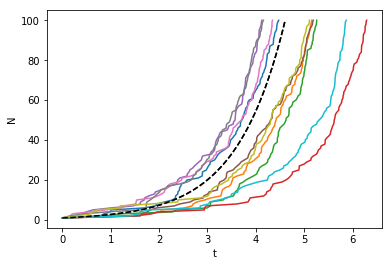

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint
from scipy import linalg

lam = 1.0
x0 = 1
xe = 100
t = np.linspace(0, np.log(100)/lam, 100)
mean = x0*np.exp(lam*t)
n = np.arange(100) + 1;
nind = np.arange(99);
nsamp = np.arange(10);
tgill = np.zeros(100);

plt.plot(t,mean,'k--')

tsum = np.zeros(100);

for j in nsamp:
    tgill[0] = 0;
    for i in nind:
        tgill[i+1] = tgill[i] - np.log(np.random.rand(1,1))/(lam*n[i])
    plt.plot(tgill, n);
    
plt.plot(t,mean,'k--');
plt.xlabel('t')
plt.ylabel('N');

## Simple Birth and Death process

In our initial studies population dynamics, we allowed for a constant birth rate per capita, $\lambda$, and death rate per capita, $\mu$.  If $\lambda - \mu > 0$, then we found that the population size will grow exponentially, while if $\lambda - \mu < 0$, the population will decay exponentially.  Let's now include death into the simple birth process to examine these competing effects in the stochastic case.

To add death to the simple birth process, we allow for transition probabilities from higher population sizes to lower sizes with rate per capita $\mu$.  Thus, the transition probabilities are 

\begin{align}
p_{i+j,i}(\Delta t) &= \text{Prob}\left\{X(t + \Delta t) = i+j | X(t) = i \right\} \\
& = \left\{
\begin{array}{ll}
\lambda i \Delta t + o(\Delta t), & j = 1 \\
1 - (\lambda + \mu)i \Delta t + o(\Delta t), & j = 0 \\
\mu i \Delta t + o(\Delta t), & j = -1\\
o(\Delta t), & j \neq -1,0,1. 
\end{array}\right.
\label{eq:pbirthdeath}
\end{align}

We'll again take $X(0) = N$.  From the transition probabilities, we see that non-zero entries of the generator matrix will be

\begin{align*}
q_{ii} &= -(\lambda + \mu) i,\\
q_{i+1,i} &= \lambda i, \\
q_{i-1,i} &= \mu i.
\end{align*}

Thus, the inclusion of death into the model results in a tridiagonal generator matrix.  It also allows the population to shrink below the original size, something that was not possible when we only had births.

As the initial population size is $N$, the state probability is $p_i(t) = p_{iN}(t)$ and the forward Kolmogorov differential equation gives,

\begin{align}
\frac{d p_0}{dt} &= \mu p_1(t)\\
\frac{d p_i}{dt} &= -(\lambda + \mu) i p_i(t) + \mu (i + 1) p_{i+1}(t) + \lambda(i-1)p_{i-1}(t). 
\label{eq:fkesimplebirthdeath}
\end{align}

At this stage, it is important to notice that if the population reaches $X(t^*) = 0$ at some time $t^*$, then $X(t) = 0$ for $t\geq t^*$.  This means that $X = 0$ is an \textit{absorber}.  It also means that the vector $\pi = (1, 0, 0, ....)$ is the unique \textit{stationary probability distribution} as it satisfies

\begin{align*}
Q\pi = 0, \text{   } \sum_{i=0}^{\infty}\pi_i = 1, \text{ and } \pi_i \geq 0
\end{align*}

for $i = 0, 1, 2, \dots$. 

For the simple birth and death process, computing directly $p_i(t)$ is not as straightforward as it was in the case of the simple birth process.  We will immediately switch our attention to finding the generating function.  As usual, we multiply \eqref{eq:fkesimplebirthdeath} by $z^i$ and sum over $i$ to find,

\begin{align*}
\frac{\partial \mathcal{P}}{\partial t} = -(\lambda + \mu)\sum_i i p_i(t) z^i + \mu \sum_i (i + 1) p_{i+1}(t) z^i - \lambda \sum_i (i-1) p_{i-1}(t) z^i.
\end{align*}

The sums in the first and third terms are identical to those we considered in the simple birth process.  The sum in the second term can be written as,

\begin{align*}
\sum_i (i + 1) p_{i+1}(t) z^i &= \sum_i i p_{i}(t) z^{i-1} \\
&= \frac{\partial \mathcal{P}}{\partial z}.
\end{align*}

Thus, the generating function for $\lambda \neq \mu$ is the solution to the partial differential equation 

\begin{align*}
\frac{\partial \mathcal{P}}{\partial t} = (z - 1)\left(\lambda z - \mu \right)\frac{\partial \mathcal{P}}{\partial z},
\end{align*}

with initial condition $\mathcal{P}(z,0) = z^N$.  We can solve this equation using the method of characteristics.  Along the curves of constant $s$, we have 

\begin{align*}
\frac{d \mathcal{P}}{d\tau} &= 0 \\
\frac{dt}{d\tau} &= 1\\
\frac{dz}{d\tau} &= (1 - z)\left(\lambda z - \mu \right)
\end{align*}

and therefore, 

\begin{align}
\mathcal{P} &= c_1 \\
t &= \tau + c_2\\
\frac{z - \mu/\lambda}{1 - z} &= c_3 e^{(\lambda - \mu)\tau}.
\label{eq:pdebdsol}
\end{align}

Taking the intial data and the curve along which it is given as being parametrised by $s$, we have that 

\begin{align*}
t(s,0) &= 0, \\
z(s,0) &= s, \\
P(s,0) &= s^N
\end{align*}

and therefore, $t = \tau$ $(c_2 = 0)$, and 

\begin{align*}
c_3 &= \frac{s - \mu/\lambda}{1 - s}.
\end{align*}

Using these expressions in the equation for $z$ in \eqref{eq:pdebdsol}, we have 

\begin{align*}
s = \frac{e^{(\mu - \lambda)t}(\lambda z - \mu) - \mu(z-1)}{e^{(\mu - \lambda)t}(\lambda z - \mu) - \lambda(z-1)}
\end{align*}

and thus,

\begin{align*}
\mathcal{P}(z,t) &= \left(\frac{e^{(\mu - \lambda)t}(\lambda z - \mu) - \mu(z-1)}{e^{(\mu - \lambda)t}(\lambda z - \mu) - \lambda(z-1)}\right)^N, \lambda \neq \mu.
\end{align*}

We can now go ahead and differentiate $\mathcal{P}$ to compute the mean and variance and find that

\begin{align*}
m(t) & = Ne^{(\lambda - \mu)t}, \\
\sigma^2(t) &= N\frac{\lambda + \mu}{\lambda - \mu}e^{(\lambda - \mu)t}\left(e^{(\lambda - \mu)t} - 1\right).
\end{align*}

We see then, that like the simple birth process, the mean satisfies the ODE,

\begin{align*}
\frac{dm}{dt} &= (\lambda - \mu)t,
\end{align*}

leading to exponential growth if $\lambda > \mu$, or exponential decay for $\lambda < \mu$.  This again coincides with our ODE model from earlier in the course.

It may seem then that stochastic model doesn't provide much additional information, but let's look more closely.  Even though we were not able to compute $p_i(t)$ directly, we can do so from the generating function using,

\begin{align*}
p_i(t) = \frac{1}{i!}\left.\frac{\partial^i \mathcal{P}}{\partial z^i}\right|_{z = 0},
\end{align*}

and therefore, we have 

\begin{align*}
p_0(t) = \left(\frac{\mu - \mu e^{(\mu - \lambda)t}}{\lambda - \mu e^{(\mu - \lambda)t}}\right)^N.
\end{align*}

If we let $t\rightarrow \infty$, 

\begin{align*}
p_0(\infty) = \left\{
\begin{array}{ll}
1,& \text{if} \lambda \leq \mu \\
\left(\frac{\mu}{\lambda}\right)^N,& \text{if} \lambda > \mu. 
\end{array}\right.
\end{align*}

We see then that even though the mean might be growing, any particular trajectory has a finite probability that it will go to zero as $t \rightarrow \infty$.  This probability depends on the ratio of death to birth rates, as well as the initial population size.  Let's consider some numerical values to put this into context.  If $\mu/\lambda = 0.9$ and $N = 1000$, then $p_0(\infty) = 1.7 \times 10^{-46}$, so the chances are slim!  If instead, $N = 50$, then $p_0 = 5.2 \times 10^{-3}$.  This shows the importance of the stochastic model when the population size is rather small.

The cell below uses Gillespie's algorithm to generate sample trajectories of the simple birth and death process and indeed one can find cases where the population becomes extinct even though $\lambda > \mu$.  

/Users/ekeaveny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


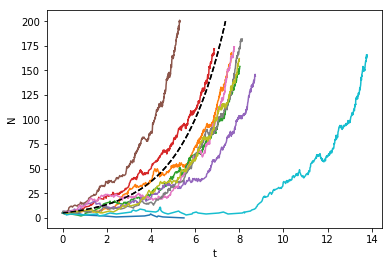

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint
from scipy import linalg

lam = 1
mu = 0.5
x0 = 5
xe = 100
t = np.linspace(0, np.log(40)/(lam - mu), 200)
mean = x0*np.exp((lam - mu)*t)
nind = np.arange(499);
nsamp = np.arange(10);
tgill = np.zeros(500);
n = np.zeros(500);
plt.plot(t,mean,'k--')

for j in nsamp:
    tgill[0] = 0;
    n[0] = 5;
    for i in nind:
        tgill[i+1] = tgill[i] - np.log(np.random.rand(1,1))/((lam + mu)*n[i])
        bord = np.random.rand(1,1);
        if bord < lam/(lam + mu):
            n[i+1] = n[i] + 1
        else:
            n[i+1] = n[i] - 1 
    plt.plot(tgill, n);

plt.plot(t,mean,'k--');

plt.xlabel('t')
plt.ylabel('N');